In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
%load_ext autoreload
%autoreload 2

In [2]:
cd ..

/home/moonbeam/Desktop/Galvanize/Capstone/Projects/Project-01/DiabetesFactorsAnalysis


In [3]:
#Read in csv data files
ntr_Act_obsty_df = pd.read_csv('data/Nutrition_PhAct_Obesity/Ntn_Phys_Act_Obesity-BRFSS.csv')

cdc_500_cities_df = pd.read_csv('data/500_Cities_Health/500_Cities__Local_Data_for_Better_Health__2019_release.csv')

In [4]:
#Clean up and preview Nutrition, Physical Activity, and Obesity Info
ntr_Act_obsty_df = pd.DataFrame(ntr_Act_obsty_df)
ntr_Act_obsty_df = ntr_Act_obsty_df.dropna(axis='columns', how='all')
ntr_Act_obsty_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63028 entries, 0 to 63027
Data columns (total 32 columns):
YearStart                     63028 non-null int64
YearEnd                       63028 non-null int64
LocationAbbr                  63028 non-null object
LocationDesc                  63028 non-null object
Datasource                    63028 non-null object
Class                         63028 non-null object
Topic                         63028 non-null object
Question                      63028 non-null object
Data_Value_Type               63028 non-null object
Data_Value                    56796 non-null float64
Data_Value_Alt                56796 non-null float64
Data_Value_Footnote_Symbol    6232 non-null object
Data_Value_Footnote           6232 non-null object
Low_Confidence_Limit          56796 non-null float64
High_Confidence_Limit         56796 non-null float64
Sample_Size                   56796 non-null float64
Total                         2251 non-null object
Age(yea

In [5]:
numerical = [
    'YearStart', 'YearEnd', 'Data_Value', 'Sample_Size'
]
categorical = [
    'LocationAbbr', 'Question', 'Age(years)', 'Education', 'Gender', 'Income', 'Race/Ethnicity', 'GeoLocation', 
]

ntr_Act_obsty_df = ntr_Act_obsty_df[numerical + categorical]
ntr_Act_obsty_df.shape

(63028, 12)

In [6]:
#Preview Nutrition, Physical Activity, and Obesity DataFrame
ntr_Act_obsty_df.head()

,YearStart,YearEnd,Data_Value,Sample_Size,LocationAbbr,Question,Age(years),Education,Gender,Income,Race/Ethnicity,GeoLocation
0,2012,2012,48.5,69.0,WY,Percent of adults aged 18 years and older who ...,NaN,NaN,NaN,NaN,American Indian/Alaska Native,"(43.235541343, -108.109830353)"
1,2012,2012,31.6,243.0,DC,Percent of adults aged 18 years and older who ...,NaN,Less than high school,NaN,NaN,NaN,"(38.890371385, -77.031961127)"
2,2011,2011,35.2,598.0,AL,Percent of adults aged 18 years and older who ...,25 - 34,NaN,NaN,NaN,NaN,"(32.840571122, -86.631860762)"
3,2013,2013,27.9,266452.0,US,Percent of adults who engage in no leisure-tim...,NaN,NaN,Female,NaN,NaN,NaN
4,2011,2011,16.9,20923.0,US,Percent of adults who engage in no leisure-tim...,18 - 24,NaN,NaN,NaN,NaN,NaN


In [7]:
#Look into what kind of questions were asked to participants
questions = ntr_Act_obsty_df['Question'].unique()
print('Amount of unique questions: ', len(questions), '\n')
print(questions)

Amount of unique questions:  9 

['Percent of adults aged 18 years and older who have an overweight classification'
 'Percent of adults aged 18 years and older who have obesity'
 'Percent of adults who engage in no leisure-time physical activity'
 'Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)'
 'Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic physical activity and engage in muscle-strengthening activities on 2 or more days a week'
 'Percent of adults who engage in muscle-strengthening activities on 2 or more days a week'
 'Percent of adults who achieve at least 300 minutes a week of moderate-intensity aerobic physical activity or 150 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)'
 'Percent o

In [8]:
from src.helper_functions import get_obese_data, get_physAct_data, get_ntrtnveg_data

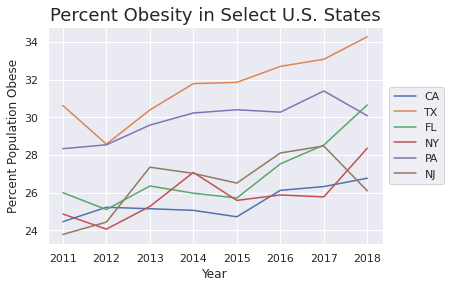

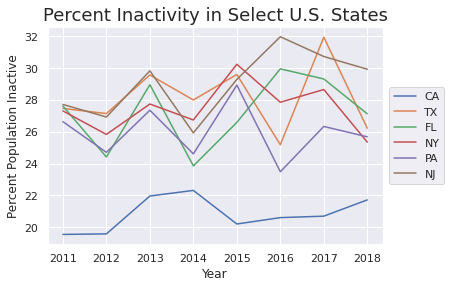

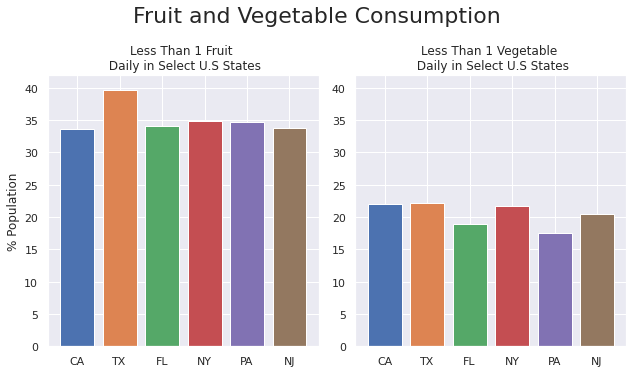

In [9]:
#Plot Obesity, Inactivity, and Nutrition information
Percent_Obese_Fig_01 = get_obese_data(ntr_Act_obsty_df, ['CA', 'TX', 'FL', 'NY', 'PA', 'NJ'])
Percent_Obese_Fig_01.savefig('img/PercentObeseUSA', dpi=200, bbox_inches='tight')

Percent_Inactive_Fig_01 = get_physAct_data(ntr_Act_obsty_df, ['CA', 'TX', 'FL', 'NY', 'PA', 'NJ'])
Percent_Inactive_Fig_01.savefig('img/PercentInactiveUSA', dpi=200, bbox_inches='tight')

Percent_FrtVeg_Fig_01 = get_ntrtnveg_data(ntr_Act_obsty_df, ['CA', 'TX', 'FL', 'NY', 'PA', 'NJ'])
Percent_FrtVeg_Fig_01.savefig('img/PercentFrtVegUSA', dpi=200, bbox_inches='tight')

In [10]:
#Construct a dictionary of relevant Health Factors
hlth_data_dict = dict()
affectors_list = [
    'Percent of adults aged 18 years and older who have obesity', 
    'Percent of adults who engage in no leisure-time physical activity', 
    'Percent of adults who report consuming fruit less than one time daily', 
    'Percent of adults who report consuming vegetables less than one time daily'
    ]
for idx, affector in enumerate(affectors_list):
    hlth_data_dict[affectors_list[idx]] = ntr_Act_obsty_df[ntr_Act_obsty_df['Question'] == affectors_list[idx]]

In [39]:
from src.helper_functions import join_dataframes, make_heat_map, plotdist, distsubplots, corrsubplots

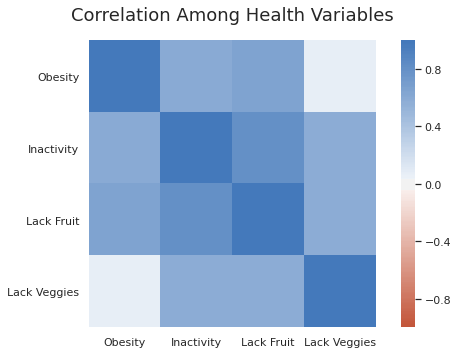

In [12]:
#Make Correlation Map between Factors
health_factors_df = join_dataframes(hlth_data_dict, affectors_list)
health_factors_df = pd.DataFrame(health_factors_df).transpose()
health_corr_fig_01 = make_heat_map(health_factors_df)
health_corr_fig_01.savefig('img/CorrHealthVar01', dpi=200, bbox_inches='tight')

In [13]:
#OBESITY Information for States: Count Distribution
obesity_data_states = ntr_Act_obsty_df[ntr_Act_obsty_df['Question'] == 'Percent of adults aged 18 years and older who have obesity']

[Text(0.5, 0, 'Percent')]

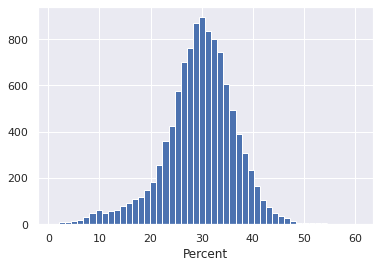

In [14]:
sns.distplot(
    obesity_data_states['Data_Value'], norm_hist=False, kde=False, bins=50, hist_kws={'alpha': 1}
).set(xlabel='Percent')

In [15]:
#ACTIVITY Information for States: Count Distribution
activity_data_states = ntr_Act_obsty_df[ntr_Act_obsty_df['Question'] == 'Percent of adults who engage in no leisure-time physical activity']

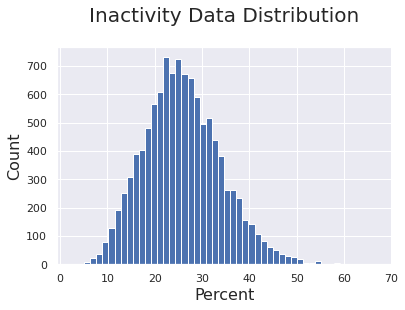

In [35]:
inactive_dist_fig_01 = plotdist(activity_data_states)

inactive_dist_fig_01.savefig('img/InactiveDataDistr', dpi=200, bbox_inches='tight')

In [17]:
#Peak info from Dataframe
cdc_500_cities_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 810103 entries, 0 to 810102
Data columns (total 24 columns):
Year                          810103 non-null int64
StateAbbr                     810103 non-null object
StateDesc                     810103 non-null object
CityName                      810047 non-null object
GeographicLevel               810103 non-null object
DataSource                    810103 non-null object
Category                      810103 non-null object
UniqueID                      810103 non-null object
Measure                       810103 non-null object
Data_Value_Unit               810103 non-null object
DataValueTypeID               810103 non-null object
Data_Value_Type               810103 non-null object
Data_Value                    787311 non-null float64
Low_Confidence_Limit          787311 non-null float64
High_Confidence_Limit         787311 non-null float64
Data_Value_Footnote_Symbol    22794 non-null object
Data_Value_Footnote           22794 non-

In [18]:
##Make list of numerical and categorical fiels of interest
numerical = [
    'Year', 'Data_Value', 'PopulationCount'
]
categorical = [
    'StateAbbr', 'CityName', 'Measure', 'GeoLocation', 'CategoryID', 'MeasureId'
]

cdc_500_cities_df = cdc_500_cities_df[numerical + categorical]
cdc_500_cities_df.shape

(810103, 9)

In [19]:
cdc_500_cities_df['MeasureId'].unique()

array(['CHECKUP', 'CHD', 'PAPTEST', 'MHLTH', 'ACCESS2', 'CSMOKING',
       'COPD', 'ARTHRITIS', 'CHOLSCREEN', 'DENTAL', 'HIGHCHOL', 'COREM',
       'PHLTH', 'COREW', 'LPA', 'SLEEP', 'BPMED', 'CANCER', 'BINGE',
       'KIDNEY', 'STROKE', 'COLON_SCREEN', 'CASTHMA', 'MAMMOUSE',
       'TEETHLOST', 'DIABETES', 'OBESITY', 'BPHIGH'], dtype=object)

In [20]:
#Make list of measures of interest
measures = [
    'No leisure-time physical activity among adults aged >=18 Years',
    'Sleeping less than 7 hours among adults aged >=18 Years',
    'Binge drinking among adults aged >=18 Years',
    'Current smoking among adults aged >=18 Years',
    'Diagnosed diabetes among adults aged >=18 Years',
    'Obesity among adults aged >=18 Years',
]

In [21]:
#Generate a Dictionary with relevant measures
cdc_data_dict = dict()
factor_list = ['Inactivity', 'Lack of Sleep', 'Drinking', 'Smoking', 'Diabetes', 'Obesity']
for idx, measure in enumerate(measures):
    cdc_data_dict[factor_list[idx]] = cdc_500_cities_df[cdc_500_cities_df['Measure'] == measures[idx]]

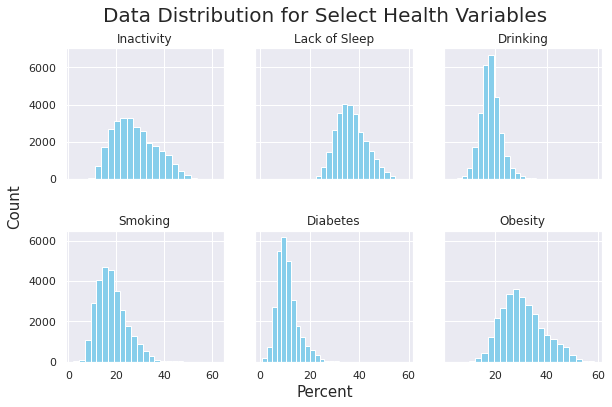

In [38]:
#Make subplots for each Health Variable Distribution
distr_tot_fig = distsubplots(cdc_data_dict)

distr_tot_fig.savefig('img/TotalDataDistr', dpi=200, bbox_inches='tight')

In [23]:
from src.helper_functions import join_dataframes, make_heat_map

In [24]:
len(hlth_data_dict)

4

In [25]:
#Join relevant Columns into a DataFrame

total_factors_df = join_dataframes(cdc_data_dict, ['Inactivity', 'Lack of Sleep', 'Drinking', 'Smoking', 'Diabetes', 'Obesity'])

total_factors_df = pd.DataFrame(total_factors_df).transpose()

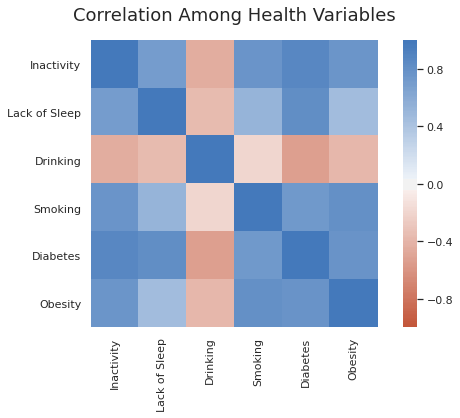

In [26]:
#Make heat map for 500 Cities Relevant factors
corr_hlth_var_Fig_02 = make_heat_map(total_factors_df)
corr_hlth_var_Fig_02.savefig('img/CorrHlthVar02', dpi=200, bbox_inches='tight')

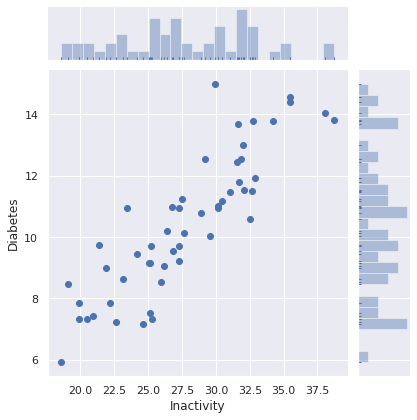

In [27]:
#Use joint plots to further visualize correlation
sns.jointplot(x='Inactivity', y='Diabetes', data=total_factors_df, marginal_kws=dict(bins=25, rug=True))

<Figure size 432x288 with 0 Axes>

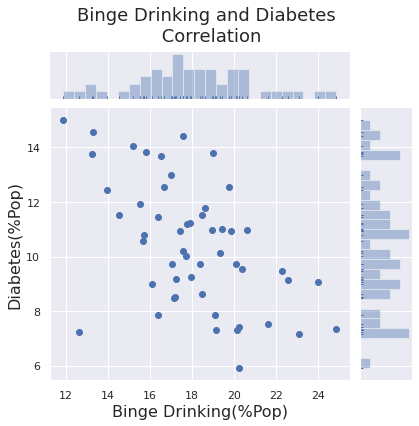

In [28]:
#Diabetes vs Binge Drinking Correlation
drinking_joint_fig = plt.figure()
g = sns.jointplot(x='Drinking', y='Diabetes', data=total_factors_df, marginal_kws=dict(bins=25, rug=True))

g.fig.suptitle('Binge Drinking and Diabetes \n Correlation', fontsize=18)
g.set_axis_labels('Binge Drinking(%Pop)', 'Diabetes(%Pop)', fontsize=16)
plt.subplots_adjust(top=0.875)
g.savefig('img/DrinkingDiabetesJoint', dpi=200, bbox_inches='tight')

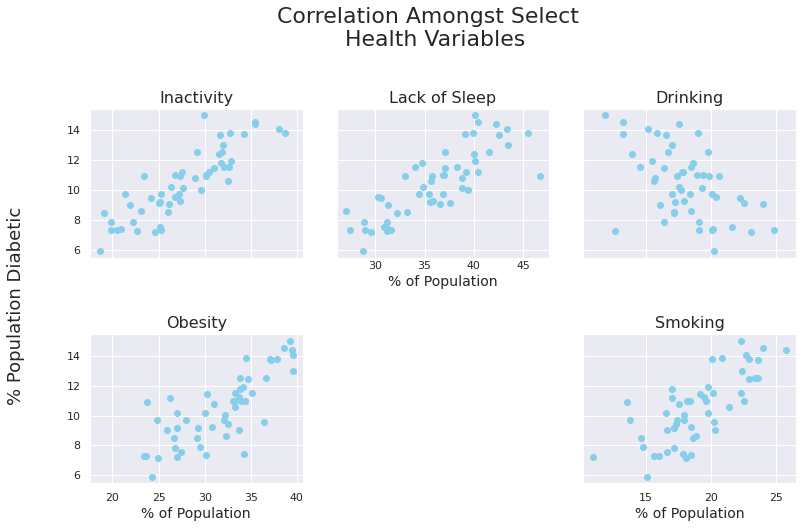

In [40]:
#Show correlation subplots for relevant factors 500 Cities Data
tot_corr_fig2 = corrsubplots(total_factors_df)

tot_corr_fig2.savefig('img/TotalCorrelation01', dpi=200, bbox_inches='tight')

In [30]:
#Calculate Statistics (average and std deviation for relevant factors)

factor_list2 = ['Inactivity', 'Lack of Sleep', 'Drinking', 'Obesity', 'Diabetes', 'Smoking']
stat = ['avg', 'std_dev']

stats_dict = dict()

for idx, fact in enumerate(factor_list2):
    stats_dict[fact] = {stat[0] : round(total_factors_df[fact].mean(), 2), stat[1] : round(total_factors_df[fact].std(), 2)} 

In [31]:
len(stats_dict)

6

In [32]:
for key, val in stats_dict.items():
    print('{}: '.format(key), stats_dict[key])

Inactivity:  {'avg': 27.69, 'std_dev': 4.94}
Lack of Sleep:  {'avg': 36.02, 'std_dev': 4.81}
Drinking:  {'avg': 18.03, 'std_dev': 2.78}
Obesity:  {'avg': 31.68, 'std_dev': 4.64}
Diabetes:  {'avg': 10.44, 'std_dev': 2.28}
Smoking:  {'avg': 18.94, 'std_dev': 3.08}


In [33]:
pd.DataFrame(stats_dict).transpose()

,avg,std_dev
Inactivity,27.69,4.94
Lack of Sleep,36.02,4.81
Drinking,18.03,2.78
Obesity,31.68,4.64
Diabetes,10.44,2.28
Smoking,18.94,3.08
